In [1]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *
from MPRA_predict.datasets import *
from MPRA_predict.metrics import *

from collections import Counter
import re

In [2]:
df = pd.read_csv('../data/Sei/Sei_tracks_info.csv')

df_pivot = df.pivot_table(
    values="index", 
    index="cell_type", 
    columns="assay", 
    aggfunc=list,
)

df_pivot

assay                    ADNP AEBP2 AFF1 AFF4 AGO1 AGO2  AHR AHRR AP-2alpha AP-2gamma APOBEC3B   AR ARID1A ARID2 ARID3A ARID5B ARNT ARNT2 ARNTL ARRB1 ASCL1 ASCL2 ASH1L ASH2L ASXL1 ATAC-seq ATF1 ATF2 ATF3 ATF4 ATF5 ATF7IP ATOH1 ATRX AUTS2 BACH1 BACH2 BAF155 BAF170 BAHD1 BANF1 BANP BARX1 BARX2 BATF BATF3 BCAT1 BCL11A BCL11B BCL3 BCL6 BCLAF1 BCOR BDP1 BHLHE40 BIRA BMI1 BPTF BRAF BRCA1 BRD1 BRD2    BRD3    BRD4 BRD7 BRD9 BRDU BRF1 BRF2 BRPF3 BTAF1 Bach1 Brg1 C11orf30 C17orf49 C17orf96 CAMTA2 CASP8AP2 CBFA2T2 CBFB CBX1 CBX2 CBX3 CBX4 CBX5 CBX6 CBX7 CBX8 CCDC101 CCND2 CCNT2 CD59 CD74 CDC5L CDCA2 CDK12 CDK2 CDK6 CDK7 CDK8 CDK9 CDX2 CEBPA CEBPB CEBPD CEBPG CEBPZ CENPA CENPC CENPT CHAMP1 CHAT CHD1 CHD2 CHD4 CHD5 CHD7 CHD8 CHRM2 CIITA CLOCK CNOT3 COPS2 COREST CPSF3L CREB1 CREB3 CREB3L4 CREBBP CREM CRY1 CSDE1 CSNK2A1 CTBP1 CTBP2 CTCF CTCFL CTNNB1 CUX1 CtBP2 DACOR1 DAXX DCP1A DDX20 DDX21 DDX5 DEAF1  DEK DIDO1 DLX1 DLX2 DMC1 DNMT1 DNMT3A DNMT3B    DNase DNase.all.peaks DNase.fdr0.01.hot  \
cell_type                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1015c                     NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN       NaN      NaN  NaN    NaN   NaN    NaN    NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN      NaN  NaN  NaN  NaN  NaN  NaN    NaN   NaN  NaN   NaN   NaN   NaN    NaN    NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN  NaN  NaN    NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN     NaN  [8996]  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  NaN      NaN      NaN      NaN    NaN      NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN   NaN   NaN  NaN  NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   NaN   NaN     NaN    NaN  NaN  NaN   NaN     NaN   NaN   NaN  NaN   NaN    NaN  NaN   NaN    NaN  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN   NaN    NaN    NaN      NaN             NaN               NaN   
10326                     NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN       NaN      NaN  NaN    NaN   NaN    NaN    NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN      NaN  NaN  NaN  NaN  NaN  NaN    NaN   NaN  NaN   NaN   NaN   NaN    NaN    NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN  NaN  NaN    NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  [8997]     NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  NaN      NaN      NaN      NaN    NaN      NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN   NaN   NaN  NaN  NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   NaN   NaN     NaN    NaN  NaN  NaN   NaN     NaN   NaN   NaN  NaN   NaN    NaN  NaN   NaN    NaN  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN   NaN    NaN    NaN      NaN             NaN               NaN   
1184_Stem_cell            NaN   

In [3]:
cell_types = ['K562', 'THP-1', 'Jurkat']
cell_types_standard_names = ['K562_Leukemia_Cell', 'THP-1', 'Jurkat_T_Lymphocyte_Blood']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K36me3', 'H3K9me3', 'CTCF']

df_track = df_pivot.loc[cell_types_standard_names][assays]
df_track.map(lambda x: len(x) if isinstance(x, list) else 0)

assay,DNase,H3K4me3,H3K27ac,H3K27me3,H3K4me1,H3K36me3,H3K9me3,CTCF
cell_type,,,,,,,,
K562_Leukemia_Cell,58,91,51,34,11,5,29,29
THP-1,0,2,5,0,0,0,2,5
Jurkat_T_Lymphocyte_Blood,3,18,9,8,2,2,1,2


In [4]:
####### Reddy_MPRA

pred_array = load_h5('outputs/Reddy_MPRA_Sei_pred.h5')
print(pred_array.shape)

(17104, 21907)


In [5]:
MPRA_df = pd.read_csv('../data/Reddy_MPRA/Reddy_MPRA.csv')

print(MPRA_df.shape)

(17104, 5)


In [6]:
for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        indice = df_track.loc[cell_types_standard_names[i], assay]

        if isinstance(indice, list) and len(indice) > 0:
            for idx in indice:
                # pred = logit(pred_array[:, idx])
                pred = pred_array[:, idx]
                true = MPRA_df[cell_type]
                r, _ = pearson(pred, true)
                print(cell_type, assay, idx, r)


K562 DNase 1490 0.42050591732043646
K562 DNase 2919 0.47990291352611464
K562 DNase 3167 0.4137506468116316
K562 DNase 4632 0.48134041837620045
K562 DNase 4633 0.4532468133018842
K562 DNase 10715 0.517403230608144
K562 DNase 10716 0.4871843464957171
K562 DNase 10717 0.43069487888346936
K562 DNase 10718 0.4606509318994598
K562 DNase 10719 0.42442431396033353
K562 DNase 10720 0.5426504746954068
K562 DNase 10721 0.4350694904449832
K562 DNase 10722 0.5070627615527684
K562 DNase 10723 0.5136905892413525
K562 DNase 10724 0.5085512876807475
K562 DNase 10725 0.5319722776317913
K562 DNase 10726 0.44718725453783625
K562 DNase 10727 0.49454203822298365
K562 DNase 10728 0.49542707356392024
K562 DNase 10729 0.5348770550983215
K562 DNase 10730 0.4852268777546204
K562 DNase 10731 0.5286743683870689
K562 DNase 10732 0.5116031026888338
K562 DNase 10749 0.5291039572209661
K562 DNase 10817 0.4730891258702884
K562 DNase 10822 0.4298057301798418
K562 DNase 10857 0.502736375900411
K562 DNase 10954 0.50615313

In [7]:
# not logit

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        indice = df_track.loc[cell_types_standard_names[i], assay]
        if isinstance(indice, list) and len(indice) > 0:
            pred = pred_array[:, indice].mean(1)
            true = MPRA_df[cell_type]
            MPRA_df[f'{cell_type}_{assay}'] = pred
        else:
            MPRA_df[f'{cell_type}_{assay}'] = np.nan

MPRA_df

,seq,Jurkat,K562,THP-1,class,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,THP-1_DNase,THP-1_H3K4me3,THP-1_H3K27ac,THP-1_H3K27me3,THP-1_H3K4me1,THP-1_H3K36me3,THP-1_H3K9me3,THP-1_CTCF,Jurkat_DNase,Jurkat_H3K4me3,Jurkat_H3K27ac,Jurkat_H3K27me3,Jurkat_H3K4me1,Jurkat_H3K36me3,Jurkat_H3K9me3,Jurkat_CTCF
0,GTCTCTGGGCCGGAAGCCCCCTCTCCTCCCCCGCCGCAGCCCCCTC...,0.565,2.132,1.965,ClassI,0.116,0.016,0.001,0.000,0.001,0.000,0.066,0.001,NaN,0.033,0.016,NaN,NaN,NaN,0.000,0.005,0.140,0.015,0.003,0.106,0.000,0.000,0.001,0.007
1,ACCCGTGGGGAGGCGGTGAACTCCTCCGCAGGGGCCGATGCCCGGG...,-0.362,-0.072,-0.941,ClassI,0.091,0.025,0.001,0.002,0.018,0.000,0.169,0.015,NaN,0.048,0.015,NaN,NaN,NaN,0.002,0.015,0.216,0.036,0.005,0.405,0.000,0.000,0.001,0.039
2,CGCTACCTCACTCACGGGCGAGAACTAAGCACCTACTGTGGACCCG...,0.166,0.504,0.393,ClassI,0.092,0.070,0.009,0.001,0.012,0.000,0.116,0.006,NaN,0.175,0.104,NaN,NaN,NaN,0.001,0.033,0.055,0.052,0.006,0.348,0.000,0.000,0.001,0.016
3,GGGGGCGCTGTGCGGGGCCCAGGCTGCGGCTCCGCTCCCGGCCACG...,-0.423,-1.086,-0.034,ClassIII,0.041,0.023,0.005,0.000,0.002,0.000,0.075,0.192,NaN,0.037,0.044,NaN,NaN,NaN,0.001,0.347,0.071,0.042,0.007,0.127,0.000,0.000,0.000,0.416
4,AACCTGGGACAACAGCAAAAAAAAAAAAAAAAAAAAAAAGGCCCCA...,0.565,0.980,0.799,ClassI,0.242,0.031,0.009,0.005,0.011,0.001,0.081,0.015,NaN,0.063,0.026,NaN,NaN,NaN,0.005,0.041,0.161,0.028,0.009,0.033,0.004,0.001,0.008,0.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17099,CCCCAAGATTAACCAGTTCTGTCCTGTCAGCAGGAGCAGGCAACTA...,-0.774,5.166,-0.528,ClassI,0.011,0.002,0.002,0.002,0.004,0.001,0.002,0.000,NaN,0.005,0.005,NaN,NaN,NaN,0.001,0.003,0.137,0.005,0.007,0.001,0.013,0.000,0.002,0.004
17100,TTGTTCACGTGTTTACCTGCTGATCTTCTCTCCACTATTATCCTAT...,-0.689,-0.735,-0.553,ClassI,0.004,0.003,0.002,0.002,0.002,0.001,0.006,0.000,NaN,0.002,0.002,NaN,NaN,NaN,0.001,0.001,0.003,0.001,0.000,0.016,0.000,0.000,0.001,0.000
17101,TTTAGTTCTGGATTCTTTTCTTTCGGTACCTCAGACACCTATGAGT...,-0.644,-0.513,-0.332,ClassII,0.158,0.009,0.004,0.002,0.014,0.001,0.008,0.001,NaN,0.038,0.044,NaN,NaN,NaN,0.001,0.026,0.037,0.002,0.001,0.005,0.001,0.000,0.003,0.002
17102,TTTAGCCACTTTCTGCCTAACCTGTCAGAAAGGGTAGATAGCTTCC...,-0.653,-0.642,-0.439,ClassIII,0.035,0.004,0.002,0.004,0.007,0.002,0.004,0.001,NaN,0.007,0.005,NaN,NaN,NaN,0.002,0.004,0.040,0.002,0.001,0.005,0.001,0.000,0.001,0.002


In [8]:
pearson_df = pd.DataFrame(index=cell_types, columns=assays, dtype=float)

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        pred = MPRA_df[f'{cell_type}_{assay}']
        true = MPRA_df[cell_type]
        r, _ = pearson(pred, true)
        pearson_df.loc[cell_type, assay] = r

pearson_df

after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan


,DNase,H3K4me3,H3K27ac,H3K27me3,H3K4me1,H3K36me3,H3K9me3,CTCF
K562,0.514,0.454,0.403,0.070,0.170,0.155,0.335,0.078
THP-1,NaN,0.250,0.416,NaN,NaN,NaN,0.238,0.144
Jurkat,0.425,0.370,0.303,0.145,0.005,0.360,0.453,0.178


In [9]:
MPRA_df.to_csv('../data/Reddy_MPRA/Reddy_MPRA_Sei_feature_0507.csv', index=False)

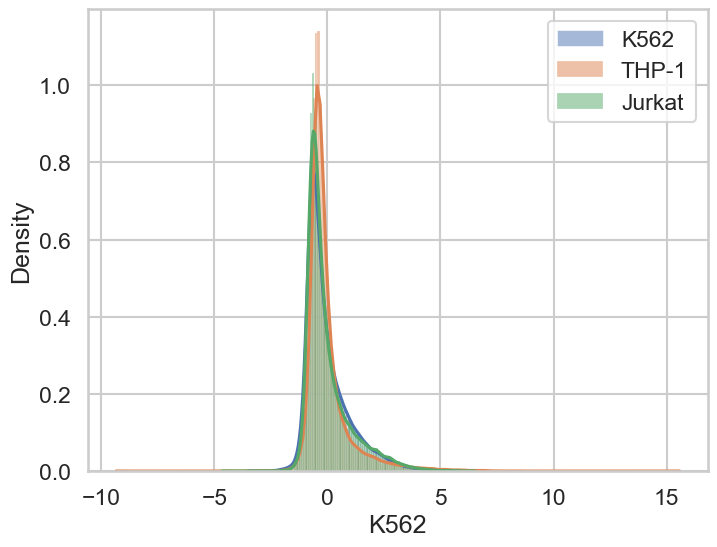

In [35]:
for col in cell_types:
    sns.histplot(MPRA_df[col].dropna(), label=col, binwidth=1e-1, kde=True, alpha=0.5, stat='density')
plt.legend()

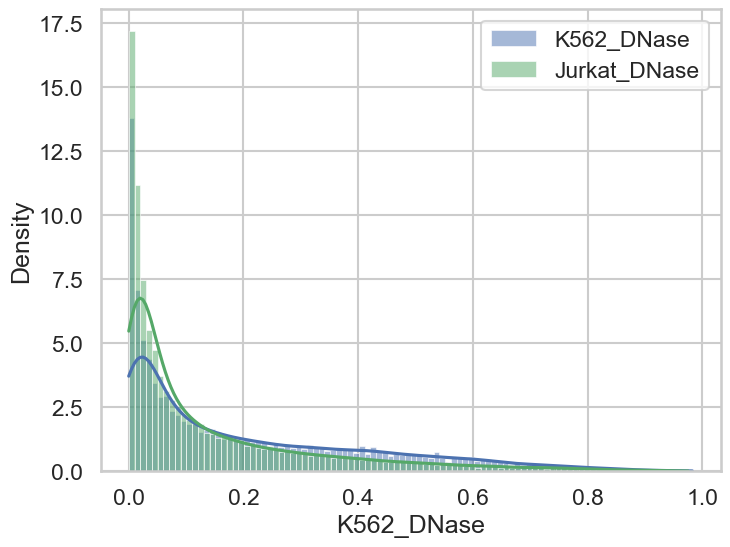

In [36]:
for col in MPRA_df.columns:
    if 'DNase' in col:
        sns.histplot(MPRA_df[col].dropna(), label=col, binwidth=1e-2, kde=True, alpha=0.5, stat='density')
plt.legend()

<Axes: xlabel='K562', ylabel='K562_DNase'>

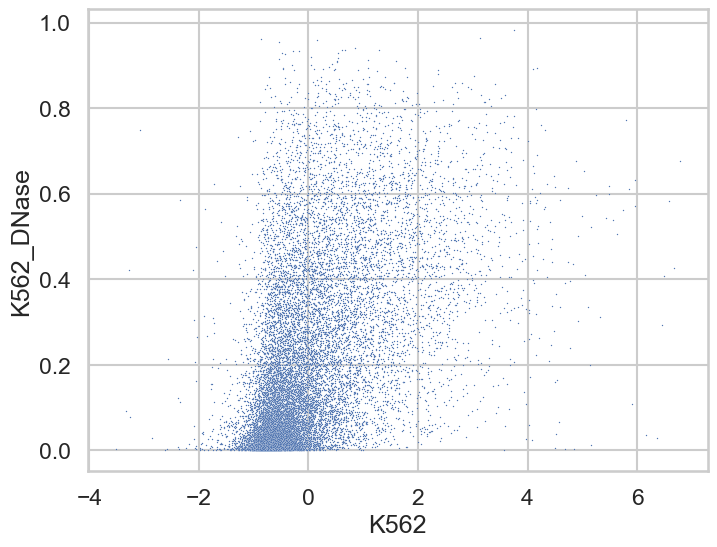

In [37]:
x = MPRA_df['K562']
y = MPRA_df['K562_DNase']
sns.scatterplot(x=x, y=y, s=1)

<Axes: xlabel='Jurkat', ylabel='Jurkat_DNase'>

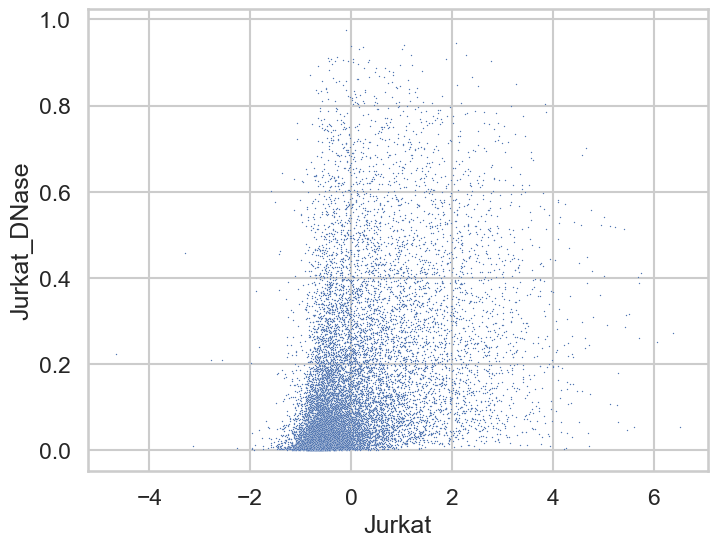

In [40]:
x = MPRA_df['Jurkat']
y = MPRA_df['Jurkat_DNase']
sns.scatterplot(x=x, y=y, s=1)

0.46840003055357904


<Axes: xlabel='Jurkat'>

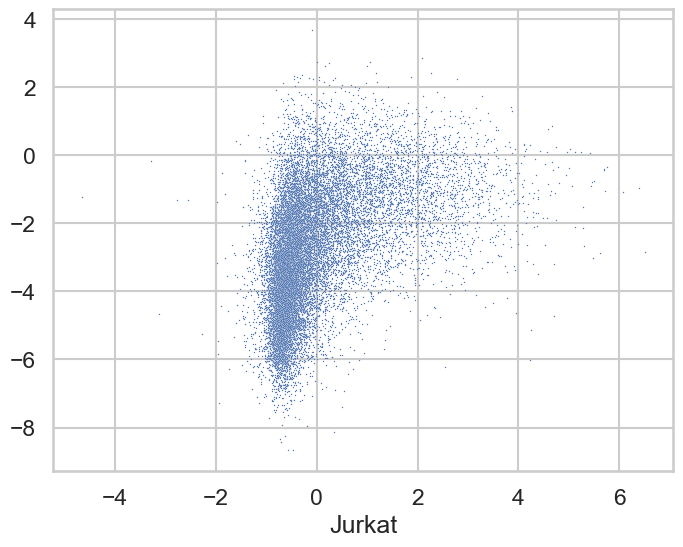

In [41]:
x = MPRA_df['Jurkat']
y = logit(MPRA_df['Jurkat_DNase'])
r = pearsonr(x, y)[0]
print(r)
sns.scatterplot(x=x, y=y, s=1)

In [ ]:
# normalize

for element in MPRA_df['element'].unique():
    condition = (MPRA_df['element'] == element)
    for i, cell_type in enumerate(cell_types):
        for j, assay in enumerate(assays):
            x = MPRA_df.loc[condition, f'{cell_type}_{assay}']
            x_mean = np.mean(x)
            x_std = np.std(x)
            x = (x - x_mean) / x_std
            MPRA_df.loc[condition, f'{cell_type}_{assay}'] = x

In [ ]:
MPRA_df.to_csv('../data/Reddy_MPRA/Reddy_MPRA.csv')

In [11]:
cell_types = ['K562', 'HepG2', 'HEK293T', 'HeLa']
cell_types_standard_names = ['K562_Leukemia_Cell', 'HepG2_Hepatocellular_Carcinoma', 'HEK293T_Epithelium_Embryonic_Kidney', 'HeLa_Cervical_Carcinoma']

assays = ['DNase', 'H3K4me3', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K36me3', 'H3K9me3', 'CTCF']


In [12]:
df_Sei_Siraj = df_pivot.loc[cell_types_standard_names][assays]
df_Sei_Siraj.map(lambda x: len(x) if isinstance(x, list) else 0)

assay,DNase,H3K4me3,H3K27ac,H3K27me3,H3K4me1,H3K36me3,H3K9me3,CTCF
cell_type,,,,,,,,
K562_Leukemia_Cell,58,91,51,34,11,5,29,29
HepG2_Hepatocellular_Carcinoma,9,8,9,2,4,3,2,17
HEK293T_Epithelium_Embryonic_Kidney,1,10,1,1,1,1,0,0
HeLa_Cervical_Carcinoma,2,32,14,2,3,5,10,6


In [23]:
####### CAGI_MPRA

pred_array = load_h5('outputs/CAGI5_MPRA_Sei_pred.h5')
print(pred_array.shape)

(44643, 21907)


In [24]:
MPRA_df = pd.read_csv('../data/CAGI5_MPRA/CAGI5_MPRA.csv')

print(MPRA_df.shape)

(44643, 9)


In [38]:
for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        indice = df_Sei_Siraj.loc[cell_types_standard_names[i], assay]
        if isinstance(indice, list) and len(indice) > 0:
            pred_feature = logit(pred_array[:, indice]).mean(1)
            MPRA_df[f'{cell_type}_{assay}'] = pred_feature
        else:
            MPRA_df[f'{cell_type}_{assay}'] = np.nan

In [39]:
MPRA_df

,chr,pos,ref,alt,value,p-value,element,cell_type,seq,match_cell_type,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,HEK293T_DNase,HEK293T_H3K4me3,HEK293T_H3K27ac,HEK293T_H3K27me3,HEK293T_H3K4me1,HEK293T_H3K36me3,HeLa_DNase,HeLa_H3K4me3,HeLa_H3K27ac,HeLa_H3K27me3,HeLa_H3K4me1,HeLa_H3K36me3,HeLa_H3K9me3,HeLa_CTCF,HEK293T_H3K9me3,HEK293T_CTCF
0,2,60722075,C,-,-0.340,0.005,BCL11A,HEL 92.1.7,CTAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGATG...,K562,-5.041,-6.965,-7.180,-7.310,-4.179,-10.343,-5.980,-8.417,-3.892,-4.612,-6.102,-5.681,-2.835,-9.413,-3.776,-7.242,-9.448,-7.954,-6.007,-7.912,-6.957,-7.165,-3.260,-9.210,-8.366,-5.403,-4.787,-10.231,-5.988,-8.749,NaN,NaN
1,2,60722075,C,A,-0.050,0.389,BCL11A,HEL 92.1.7,ACTAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGAT...,K562,-5.586,-7.429,-7.603,-7.327,-4.644,-10.318,-6.012,-8.598,-3.875,-4.750,-6.242,-5.718,-3.071,-9.367,-3.986,-7.345,-9.306,-8.099,-6.129,-7.956,-7.186,-7.204,-3.210,-9.075,-8.247,-5.354,-4.680,-10.094,-6.080,-8.720,NaN,NaN
2,2,60722075,C,G,-0.130,0.137,BCL11A,HEL 92.1.7,GCTAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGAT...,K562,-5.560,-7.402,-7.600,-7.306,-4.627,-10.307,-6.018,-8.565,-3.854,-4.731,-6.246,-5.681,-3.052,-9.343,-3.994,-7.304,-9.293,-8.084,-6.115,-7.964,-7.156,-7.217,-3.251,-9.080,-8.291,-5.327,-4.700,-10.089,-6.093,-8.693,NaN,NaN
3,2,60722075,C,T,-0.700,0.000,BCL11A,HEL 92.1.7,TCTAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGAT...,K562,-5.612,-7.480,-7.628,-7.325,-4.673,-10.322,-6.031,-8.612,-3.909,-4.832,-6.296,-5.745,-3.085,-9.366,-3.955,-7.364,-9.291,-8.140,-6.142,-7.933,-7.183,-7.257,-3.273,-9.135,-8.281,-5.342,-4.708,-10.096,-6.074,-8.713,NaN,NaN
4,2,60722076,C,A,-0.080,0.004,BCL11A,HEL 92.1.7,CATAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGAT...,K562,-5.658,-7.506,-7.667,-7.359,-4.688,-10.353,-6.026,-8.677,-3.946,-4.851,-6.350,-5.770,-3.111,-9.390,-3.940,-7.438,-9.369,-8.178,-6.201,-7.998,-7.230,-7.271,-3.348,-9.196,-8.348,-5.358,-4.763,-10.137,-6.066,-8.822,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44638,7,156584296,G,T,0.100,0.000,ZRSh-13h2,NIH/3T3 (with HOXD13/ HOXD13+HAND2),TGAGATATGGCTTCATTTTCTGTAATAAACACTAAGATCAAAACAT...,NaN,-6.826,-9.651,-8.096,-7.209,-6.983,-9.851,-7.932,-7.959,-9.499,-10.137,-10.688,-6.838,-7.390,-9.538,-3.750,-7.990,-8.283,-8.949,-5.624,-6.556,-7.386,-9.413,-3.399,-10.391,-8.561,-5.689,-5.491,-10.517,-6.272,-6.691,NaN,NaN
44639,7,156584297,C,-,0.040,0.112,ZRSh-13h2,NIH/3T3 (with HOXD13/ HOXD13+HAND2),TGAGATATGGCTTCATTTTCTGTAATAAACACTAAGATCAAAACAT...,NaN,-6.535,-9.285,-7.562,-7.154,-6.740,-9.535,-7.626,-7.647,-9.418,-10.013,-10.378,-6.610,-7.446,-9.308,-3.477,-7.759,-7.898,-8.892,-5.448,-6.679,-7.475,-9.406,-3.391,-10.335,-8.336,-5.670,-5.543,-10.101,-5.926,-6.429,NaN,NaN
44640,7,156584297,C,A,-0.170,0.334,ZRSh-13h2,NIH/3T3 (with HOXD13/ HOXD13+HAND2),TGAGATATGGCTTCATTTTCTGTAATAAACACTAAGATCAAAACAT...,NaN,-6.741,-9.460,-7.972,-7.267,-6.965,-9.905,-7.951,-7.947,-9.566,-9.925,-10.624,-6.789,-7.343,-9.514,-3.781,-8.015,-8.253,-8.968,-5.464,-6.655,-7.429,-9.520,-3.638,-10.451,-8.661,-5.735,-5.722,-10.546,-6.267,-6.774,NaN,NaN
44641,7,156584297,C,G,0.060,0.091,ZRSh-13h2,NIH/3T3 (with HOXD13/ HOXD13+HAND2),TGAGATATGGCTTCATTTTCTGTAATAAACACTAAGATCAAAACAT...,NaN,-6.681,-9.364,-7.934,-7.171,-6.928,-9.829,-7.814,-7.829,-9.471,-9.801,-10.553,-6.602,-7.244,-9.420,-3.830,-7.902,-8.162,-8.870,-5.448,-6.552,-7.313,-9.387,-3.577,-10.330,-8.624,-5.641,-5.665,-10.414,-6.211,-6.692,NaN,NaN


In [29]:
MPRA_df.to_csv('../data/CAGI5_MPRA/CAGI5_MPRA_Sei_feature.csv', index=False)

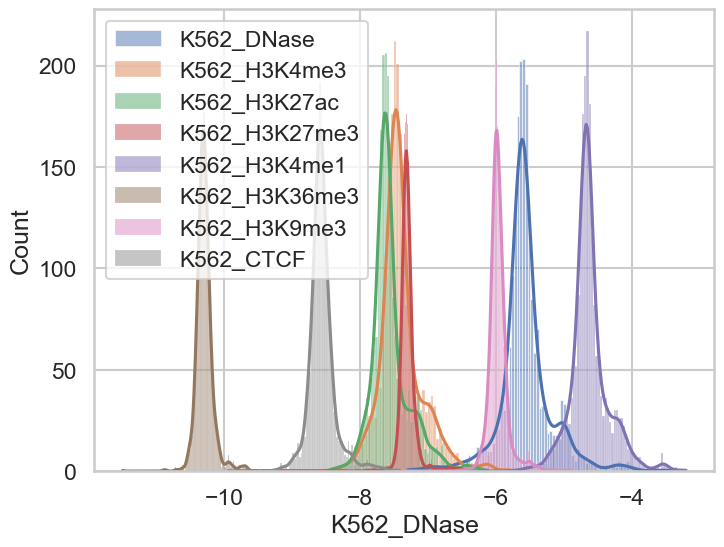

In [36]:
for col in MPRA_df.columns:
    if 'K562' in col:
        df = MPRA_df[MPRA_df['element'] == 'BCL11A']
        sns.histplot(df[col], label=col, kde=True)
plt.legend()

In [42]:
# normalize

for element in MPRA_df['element'].unique():
    condition = (MPRA_df['element'] == element)
    for i, cell_type in enumerate(cell_types):
        for j, assay in enumerate(assays):
            x = MPRA_df.loc[condition, f'{cell_type}_{assay}']
            x_mean = np.mean(x)
            x_std = np.std(x)
            x = (x - x_mean) / x_std
            MPRA_df.loc[condition, f'{cell_type}_{assay}'] = x

In [43]:
MPRA_df

,chr,pos,ref,alt,value,p-value,element,cell_type,seq,match_cell_type,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,HEK293T_DNase,HEK293T_H3K4me3,HEK293T_H3K27ac,HEK293T_H3K27me3,HEK293T_H3K4me1,HEK293T_H3K36me3,HeLa_DNase,HeLa_H3K4me3,HeLa_H3K27ac,HeLa_H3K27me3,HeLa_H3K4me1,HeLa_H3K36me3,HeLa_H3K9me3,HeLa_CTCF,HEK293T_H3K9me3,HEK293T_CTCF
0,2,60722075,C,-,-0.340,0.005,BCL11A,HEL 92.1.7,CTAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGATG...,K562,1.332,1.350,1.293,-0.080,1.532,-0.412,-0.091,0.742,0.100,0.456,0.372,0.114,0.608,-0.546,1.081,0.411,-1.162,0.887,0.666,0.092,1.166,0.253,0.098,-0.497,-0.365,-0.493,-0.206,-1.263,0.198,-0.384,NaN,NaN
1,2,60722075,C,A,-0.050,0.389,BCL11A,HEL 92.1.7,ACTAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGAT...,K562,-0.057,-0.093,-0.171,-0.202,-0.070,-0.213,-0.308,-0.189,0.138,0.148,0.069,-0.103,0.041,-0.223,-0.408,-0.059,-0.175,-0.005,0.035,-0.194,-0.141,-0.017,0.304,0.358,0.219,-0.153,0.226,-0.176,-0.388,-0.151,NaN,NaN
2,2,60722075,C,G,-0.130,0.137,BCL11A,HEL 92.1.7,GCTAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGAT...,K562,0.008,-0.008,-0.160,-0.051,-0.009,-0.125,-0.346,-0.016,0.186,0.190,0.059,0.113,0.086,-0.054,-0.464,0.127,-0.091,0.091,0.108,-0.244,0.028,-0.106,0.138,0.325,0.004,0.035,0.147,-0.135,-0.466,0.067,NaN,NaN
3,2,60722075,C,T,-0.700,0.000,BCL11A,HEL 92.1.7,TCTAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGAT...,K562,-0.122,-0.250,-0.257,-0.189,-0.169,-0.241,-0.437,-0.261,0.060,-0.035,-0.048,-0.256,0.007,-0.220,-0.190,-0.143,-0.074,-0.256,-0.034,-0.043,-0.123,-0.389,0.048,-0.021,0.049,-0.068,0.111,-0.196,-0.348,-0.093,NaN,NaN
4,2,60722076,C,A,-0.080,0.004,BCL11A,HEL 92.1.7,CATAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGAT...,K562,-0.241,-0.333,-0.390,-0.432,-0.219,-0.497,-0.406,-0.596,-0.026,-0.078,-0.165,-0.406,-0.055,-0.384,-0.085,-0.480,-0.615,-0.487,-0.341,-0.463,-0.395,-0.482,-0.262,-0.407,-0.277,-0.179,-0.107,-0.515,-0.298,-0.974,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44638,7,156584296,G,T,0.100,0.000,ZRSh-13h2,NIH/3T3 (with HOXD13/ HOXD13+HAND2),TGAGATATGGCTTCATTTTCTGTAATAAACACTAAGATCAAAACAT...,NaN,-1.604,-2.237,-2.706,-0.435,-1.755,-1.335,-1.629,-0.029,-0.666,-1.857,-1.850,-1.015,-1.179,-1.892,-0.517,0.052,-1.093,-1.249,-1.946,0.423,-0.606,0.081,-0.288,-1.239,-1.451,0.301,-0.646,-1.538,-0.760,0.117,NaN,NaN
44639,7,156584297,C,-,0.040,0.112,ZRSh-13h2,NIH/3T3 (with HOXD13/ HOXD13+HAND2),TGAGATATGGCTTCATTTTCTGTAATAAACACTAAGATCAAAACAT...,NaN,-0.393,-0.710,0.100,0.117,-0.593,0.752,1.067,0.574,-0.345,-1.422,-0.695,0.252,-1.443,-0.137,1.992,0.464,1.147,-0.961,-1.328,-0.224,-0.988,0.134,-0.257,-1.010,-0.460,0.453,-0.852,1.166,1.965,0.598,NaN,NaN
44640,7,156584297,C,A,-0.170,0.334,ZRSh-13h2,NIH/3T3 (with HOXD13/ HOXD13+HAND2),TGAGATATGGCTTCATTTTCTGTAATAAACACTAAGATCAAAACAT...,NaN,-1.248,-1.440,-2.055,-1.017,-1.673,-1.697,-1.796,-0.005,-0.926,-1.115,-1.613,-0.737,-0.958,-1.709,-0.809,0.006,-0.918,-1.349,-1.383,-0.100,-0.792,-0.734,-1.203,-1.483,-1.891,-0.065,-1.570,-1.724,-0.719,-0.034,NaN,NaN
44641,7,156584297,C,G,0.060,0.091,ZRSh-13h2,NIH/3T3 (with HOXD13/ HOXD13+HAND2),TGAGATATGGCTTCATTTTCTGTAATAAACACTAAGATCAAAACAT...,NaN,-1.002,-1.041,-1.859,-0.046,-1.494,-1.190,-0.593,0.222,-0.555,-0.684,-1.345,0.300,-0.499,-0.991,-1.259,0.209,-0.388,-0.849,-1.328,0.442,-0.297,0.282,-0.968,-0.989,-1.731,0.685,-1.340,-0.867,-0.281,0.116,NaN,NaN


In [44]:
MPRA_df.to_csv('../data/CAGI5_MPRA/CAGI5_MPRA_Sei_feature_norm.csv', index=False)

In [45]:
MPRA_df = pd.read_csv('../data/CAGI5_MPRA/CAGI5_MPRA_Sei_feature_norm.csv')
MPRA_df

/tmp/ipykernel_54568/647625667.py:1: DtypeWarning: Columns (0,9) have mixed types. Specify dtype option on import or set low_memory=False.
  MPRA_df = pd.read_csv('../data/CAGI5_MPRA/CAGI5_MPRA_Sei_feature_norm.csv')


,chr,pos,ref,alt,value,p-value,element,cell_type,seq,match_cell_type,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,HEK293T_DNase,HEK293T_H3K4me3,HEK293T_H3K27ac,HEK293T_H3K27me3,HEK293T_H3K4me1,HEK293T_H3K36me3,HeLa_DNase,HeLa_H3K4me3,HeLa_H3K27ac,HeLa_H3K27me3,HeLa_H3K4me1,HeLa_H3K36me3,HeLa_H3K9me3,HeLa_CTCF,HEK293T_H3K9me3,HEK293T_CTCF
0,2,60722075,C,-,-0.340,0.005,BCL11A,HEL 92.1.7,CTAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGATG...,K562,1.332,1.350,1.293,-0.080,1.532,-0.412,-0.091,0.742,0.100,0.456,0.372,0.114,0.608,-0.546,1.081,0.411,-1.162,0.887,0.666,0.092,1.166,0.253,0.098,-0.497,-0.365,-0.493,-0.206,-1.263,0.198,-0.384,NaN,NaN
1,2,60722075,C,A,-0.050,0.389,BCL11A,HEL 92.1.7,ACTAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGAT...,K562,-0.057,-0.093,-0.171,-0.202,-0.070,-0.213,-0.308,-0.189,0.138,0.148,0.069,-0.103,0.041,-0.223,-0.408,-0.059,-0.175,-0.005,0.035,-0.194,-0.141,-0.017,0.304,0.358,0.219,-0.153,0.226,-0.176,-0.388,-0.151,NaN,NaN
2,2,60722075,C,G,-0.130,0.137,BCL11A,HEL 92.1.7,GCTAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGAT...,K562,0.008,-0.008,-0.160,-0.051,-0.009,-0.125,-0.346,-0.016,0.186,0.190,0.059,0.113,0.086,-0.054,-0.464,0.127,-0.091,0.091,0.108,-0.244,0.028,-0.106,0.138,0.325,0.004,0.035,0.147,-0.135,-0.466,0.067,NaN,NaN
3,2,60722075,C,T,-0.700,0.000,BCL11A,HEL 92.1.7,TCTAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGAT...,K562,-0.122,-0.250,-0.257,-0.189,-0.169,-0.241,-0.437,-0.261,0.060,-0.035,-0.048,-0.256,0.007,-0.220,-0.190,-0.143,-0.074,-0.256,-0.034,-0.043,-0.123,-0.389,0.048,-0.021,0.049,-0.068,0.111,-0.196,-0.348,-0.093,NaN,NaN
4,2,60722076,C,A,-0.080,0.004,BCL11A,HEL 92.1.7,CATAACACAGTAGCTGGTACCTGATAGGTGCCTATATGTGATGGAT...,K562,-0.241,-0.333,-0.390,-0.432,-0.219,-0.497,-0.406,-0.596,-0.026,-0.078,-0.165,-0.406,-0.055,-0.384,-0.085,-0.480,-0.615,-0.487,-0.341,-0.463,-0.395,-0.482,-0.262,-0.407,-0.277,-0.179,-0.107,-0.515,-0.298,-0.974,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44638,7,156584296,G,T,0.100,0.000,ZRSh-13h2,NIH/3T3 (with HOXD13/ HOXD13+HAND2),TGAGATATGGCTTCATTTTCTGTAATAAACACTAAGATCAAAACAT...,NaN,-1.604,-2.237,-2.706,-0.435,-1.755,-1.335,-1.629,-0.029,-0.666,-1.857,-1.850,-1.015,-1.179,-1.892,-0.517,0.052,-1.093,-1.249,-1.946,0.423,-0.606,0.081,-0.288,-1.239,-1.451,0.301,-0.646,-1.538,-0.760,0.117,NaN,NaN
44639,7,156584297,C,-,0.040,0.112,ZRSh-13h2,NIH/3T3 (with HOXD13/ HOXD13+HAND2),TGAGATATGGCTTCATTTTCTGTAATAAACACTAAGATCAAAACAT...,NaN,-0.393,-0.710,0.100,0.117,-0.593,0.752,1.067,0.574,-0.345,-1.422,-0.695,0.252,-1.443,-0.137,1.992,0.464,1.147,-0.961,-1.328,-0.224,-0.988,0.134,-0.257,-1.010,-0.460,0.453,-0.852,1.166,1.965,0.598,NaN,NaN
44640,7,156584297,C,A,-0.170,0.334,ZRSh-13h2,NIH/3T3 (with HOXD13/ HOXD13+HAND2),TGAGATATGGCTTCATTTTCTGTAATAAACACTAAGATCAAAACAT...,NaN,-1.248,-1.440,-2.055,-1.017,-1.673,-1.697,-1.796,-0.005,-0.926,-1.115,-1.613,-0.737,-0.958,-1.709,-0.809,0.006,-0.918,-1.349,-1.383,-0.100,-0.792,-0.734,-1.203,-1.483,-1.891,-0.065,-1.570,-1.724,-0.719,-0.034,NaN,NaN
44641,7,156584297,C,G,0.060,0.091,ZRSh-13h2,NIH/3T3 (with HOXD13/ HOXD13+HAND2),TGAGATATGGCTTCATTTTCTGTAATAAACACTAAGATCAAAACAT...,NaN,-1.002,-1.041,-1.859,-0.046,-1.494,-1.190,-0.593,0.222,-0.555,-0.684,-1.345,0.300,-0.499,-0.991,-1.259,0.209,-0.388,-0.849,-1.328,0.442,-0.297,0.282,-0.968,-0.989,-1.731,0.685,-1.340,-0.867,-0.281,0.116,NaN,NaN


In [46]:
for i, row in MPRA_df.iterrows():
    if len(MPRA_df.loc[i, 'seq']) > 600:
        MPRA_df.loc[i, 'seq'] = MPRA_df.loc[i, 'seq'][:600]

In [47]:
MPRA_df.to_csv('../data/CAGI5_MPRA/CAGI5_MPRA_Sei_feature_norm.csv', index=False)